In [3]:
#importamos librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Cargar el dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

In [5]:
# Seleccionar solo dos clases: setosa (0) y versicolor (1)
is_setosa_or_versicolor = y < 2
X, y = X[is_setosa_or_versicolor], y[is_setosa_or_versicolor]

In [6]:
# Seleccionar solo dos características: longitud y ancho del sépalo
X = X[:, :2]

In [7]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
# Inicializar y entrenar el perceptrón
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)


Perceptron(random_state=42)

In [9]:
# Realizar predicciones
y_pred = perceptron.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor']))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        17
  Versicolor       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



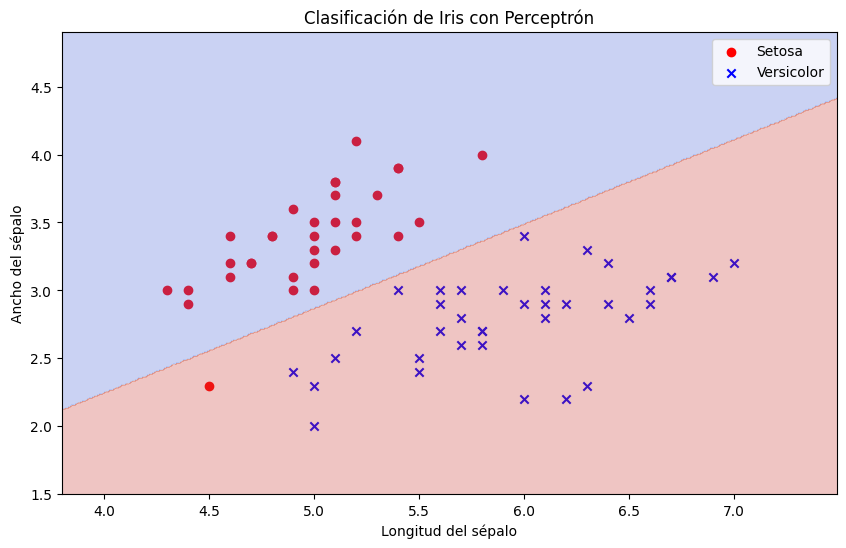

In [10]:
# Graficar los datos y la frontera de decisión
plt.figure(figsize=(10, 6))

# Graficar los datos de entrenamiento
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Setosa', marker='o')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Versicolor', marker='x')

# Graficar la frontera de decisión
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.title('Clasificación de Iris con Perceptrón')
plt.legend()
plt.show()
